# Chuẩn bị các thư viện cần thiết và dữ liệu

**Import các thư viện cần thiết.**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import ast
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib import ticker
warnings.simplefilter('ignore')

**Load dữ liệu**

In [4]:
df = pd.read_csv("../../raw_data/Big_DS_raw.csv")

In [31]:
df.head()

,title,year,rating,genre,runtime,imdb,votes,releaseds,budgets,companies,origins,gross,directors,writers,stars
0,Guardians of the Galaxy Vol. 3,2023,PG-13,"['Action', ' Adventure', ' Comedy']",150,8.3,73855,"May 5, 2023",250000000.0,"['Marvel Studios', 'Film New Zealand', 'Marvel...","['United States', 'Canada', 'New Zealand']",3.187391e+08,['James Gunn'],['James Gunn'],"['Chris Pratt', 'Chukwudi Iwuji', 'Bradley Coo..."
1,Peter Pan & Wendy,2023,PG,"['Action', ' Adventure', ' Comedy']",106,4.2,16238,"April 28, 2023",NaN,"['Walt Disney Pictures', 'Whitaker Entertainme...",['United States'],NaN,['David Lowery'],"['David Lowery', 'Toby Halbrooks', 'J.M. Barrie']","['Alexander Molony', 'Ever Anderson', 'Jude Law']"
2,Evil Dead Rise,2023,R,['Horror'],96,7.0,39889,"April 21, 2023",12000000.0,"['Department of Post', 'Ghost House Pictures',...","['United States', 'New Zealand', 'Ireland']",1.158121e+08,['Lee Cronin'],['Lee Cronin'],"['Mirabai Pease', 'Richard Crouchley', 'Anna-M..."
3,Dungeons & Dragons: Honor Among Thieves,2023,PG-13,"['Action', ' Adventure', ' Comedy']",134,7.4,79732,"March 31, 2023",150000000.0,"['Paramount Pictures', 'Entertainment One', 'A...","['United States', 'Canada', 'United Kingdom', ...",2.026149e+08,"['John Francis Daley', 'Jonathan Goldstein']","['Jonathan Goldstein', 'John Francis Daley', '...","['Chris Pine', 'Michelle Rodriguez', 'Regé-Jea..."
4,The Super Mario Bros. Movie,2023,PG,"['Animation', ' Adventure', ' Comedy']",92,7.3,93663,"April 5, 2023",100000000.0,"['Universal Pictures', 'Nintendo', 'Illuminati...","['United States', 'Japan']",1.163353e+09,"['Aaron Horvath', 'Michael Jelenic', 'Pierre L...",['Matthew Fogel'],"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Day']"


# Làm sạch dữ liệu <br>

**Xử lý lại các trường có kiểu list.**

In [32]:
list_features = ['genre', 'companies', 'origins', 'directors', 'writers', 'stars']
for feat in list_features:
    df[feat] = df[feat].apply(lambda x: [genre.strip() for genre in ast.literal_eval(x)])
df.head()

,title,year,rating,genre,runtime,imdb,votes,releaseds,budgets,companies,origins,gross,directors,writers,stars
0,Guardians of the Galaxy Vol. 3,2023,PG-13,"[Action, Adventure, Comedy]",150,8.3,73855,"May 5, 2023",250000000.0,"[Marvel Studios, Film New Zealand, Marvel Ente...","[United States, Canada, New Zealand]",3.187391e+08,[James Gunn],[James Gunn],"[Chris Pratt, Chukwudi Iwuji, Bradley Cooper]"
1,Peter Pan & Wendy,2023,PG,"[Action, Adventure, Comedy]",106,4.2,16238,"April 28, 2023",NaN,"[Walt Disney Pictures, Whitaker Entertainment,...",[United States],NaN,[David Lowery],"[David Lowery, Toby Halbrooks, J.M. Barrie]","[Alexander Molony, Ever Anderson, Jude Law]"
2,Evil Dead Rise,2023,R,[Horror],96,7.0,39889,"April 21, 2023",12000000.0,"[Department of Post, Ghost House Pictures, New...","[United States, New Zealand, Ireland]",1.158121e+08,[Lee Cronin],[Lee Cronin],"[Mirabai Pease, Richard Crouchley, Anna-Maree ..."
3,Dungeons & Dragons: Honor Among Thieves,2023,PG-13,"[Action, Adventure, Comedy]",134,7.4,79732,"March 31, 2023",150000000.0,"[Paramount Pictures, Entertainment One, Allspa...","[United States, Canada, United Kingdom, Icelan...",2.026149e+08,"[John Francis Daley, Jonathan Goldstein]","[Jonathan Goldstein, John Francis Daley, Micha...","[Chris Pine, Michelle Rodriguez, Regé-Jean Page]"
4,The Super Mario Bros. Movie,2023,PG,"[Animation, Adventure, Comedy]",92,7.3,93663,"April 5, 2023",100000000.0,"[Universal Pictures, Nintendo, Illumination En...","[United States, Japan]",1.163353e+09,"[Aaron Horvath, Michael Jelenic, Pierre Leduc]",[Matthew Fogel],"[Chris Pratt, Anya Taylor-Joy, Charlie Day]"


**Xuất ra file clean.**

In [33]:
df.to_csv('../../clean_data/Big_DS_clean.csv', index=False)

# Xử lý dữ liệu

**1. Xử lý dữ liệu trống**

In [34]:
print(df.isnull().sum())

title           0
year            0
rating        277
genre           0
runtime         0
imdb            0
votes           0
releaseds       0
budgets      3460
companies       0
origins         0
gross        1225
directors       0
writers         0
stars           0
dtype: int64


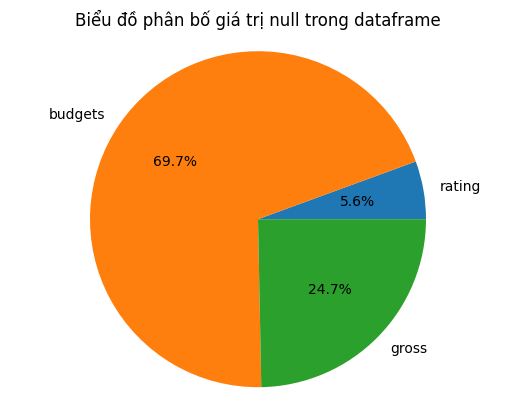

In [35]:
null_counts = df.isnull().sum()
values = null_counts[['rating','budgets','gross']]
labels = values.index
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Biểu đồ phân bố giá trị null trong dataframe')
plt.show()

- Tập dữ liệu có các trường chứa dữ liệu trống đó là rating, budgets, gross <br>
- Budgets, gross là trường chứa dữ liệu trống nhiều nhất, tuy nhiên, việc fill các trường này bằng các kỹ thuật Mean/Median/Mode/... không đảm bảo được tính chính xác của dữ liệu (range budgets, gross phim không nằm trong một khoảng cố định nào cả). <br>
- Tương tự đối với trường rating, mỗi phim sẽ có mỗi rating phim khác nhau để phân loại phim, các giá trị trống này không thể thay thế bằng các giá trị khác hợp lý nên ta cũng sẽ xóa các record null này đi.

In [36]:
missing_features = ['budgets', 'rating', 'gross']
for feat in missing_features:
    df.dropna(subset=[feat], inplace=True)

Kiểm tra lại df sau khi remove các record null

In [37]:
print(df.shape[0])
print(df.isnull().sum())
df_copy = df.copy()

6053
title        0
year         0
rating       0
genre        0
runtime      0
imdb         0
votes        0
releaseds    0
budgets      0
companies    0
origins      0
gross        0
directors    0
writers      0
stars        0
dtype: int64


In [38]:
print("Tổng dữ liệu trước khi loại bỏ các giá trị null: ", 1000)
print("Tổng dữ liệu sau khi loại bỏ các giá trị null: ", df.shape[0])
print("% mất mát dữ liệu sau khi loại bỏ các giá trị null: ", 100-(df.shape[0]/1000*100), "%")

Tổng dữ liệu trước khi loại bỏ các giá trị null:  1000
Tổng dữ liệu sau khi loại bỏ các giá trị null:  6053
% mất mát dữ liệu sau khi loại bỏ các giá trị null:  -505.29999999999995 %


**<p>2. Rating**

In [39]:
df['rating'].value_counts()

R            2777
PG-13        1833
PG            955
Not Rated     193
G             151
Passed         48
Approved       41
TV-MA          15
NC-17          13
Unrated        10
GP              5
TV-14           3
TV-PG           2
M/PG            1
M               1
C16             1
X               1
16+             1
13+             1
TV-G            1
Name: rating, dtype: int64

- Có rất nhiều kiểu rating đã thu thập được trong tập dữ liệu. Trong bài toán này ta sẽ chỉ giữ lại 5 rating phổ biến nhất còn được sử dụng ngày nay đó chính là R, PG-13, PG, G và NC-17.
- Thực tế là các kiểu rating TV-MA sẽ tương đương với R, TV-PG tương đương với PG, và theo lịch sử đặt tên rating đã ghi nhận được, rating M = GP = PG, X = NC-17.
- Các rating như Not Rated, Passed, Unrated sẽ được thay thế bằng rating phổ biến nhất đó là R, Approved sẽ được thay thế bằng G.

In [40]:
df['rating'] = df['rating'].replace(['13+', 'TV-14'], 'PG-13')
df['rating'] = df['rating'].replace(['16+', 'C16', 'TV-MA','Not Rated', 'Passed', 'Unrated'], 'R')
df['rating'] = df['rating'].replace(['M', 'M/PG','GP', 'TV-PG'], 'PG')
df['rating'] = df['rating'].replace('X', 'NC-17')
df['rating'] = df['rating'].replace(['Approved', 'TV-G'], 'G')
df['rating'].value_counts()

R        3045
PG-13    1837
PG        964
G         193
NC-17      14
Name: rating, dtype: int64

Bây giờ ta có được 5 rating phổ biến nhất là R, PG-13, PG, G và NC-17.

In [41]:
def plotPieChart(ax, ratings, rating_counts, type, feat):
    ax.pie(rating_counts.values, labels=None)
    legend_labels = [f'{rating}: {count} ({count / len(ratings) * 100:.2f}%)' for rating, count in zip(rating_counts.index, rating_counts.values)]
    ax.legend(legend_labels, title='Ratings', loc='best', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Biểu đồ phân phối {feat} {type} khi xử lý dữ liệu')
    formatter = ticker.PercentFormatter(xmax=len(ratings))
    ax.yaxis.set_major_formatter(formatter)

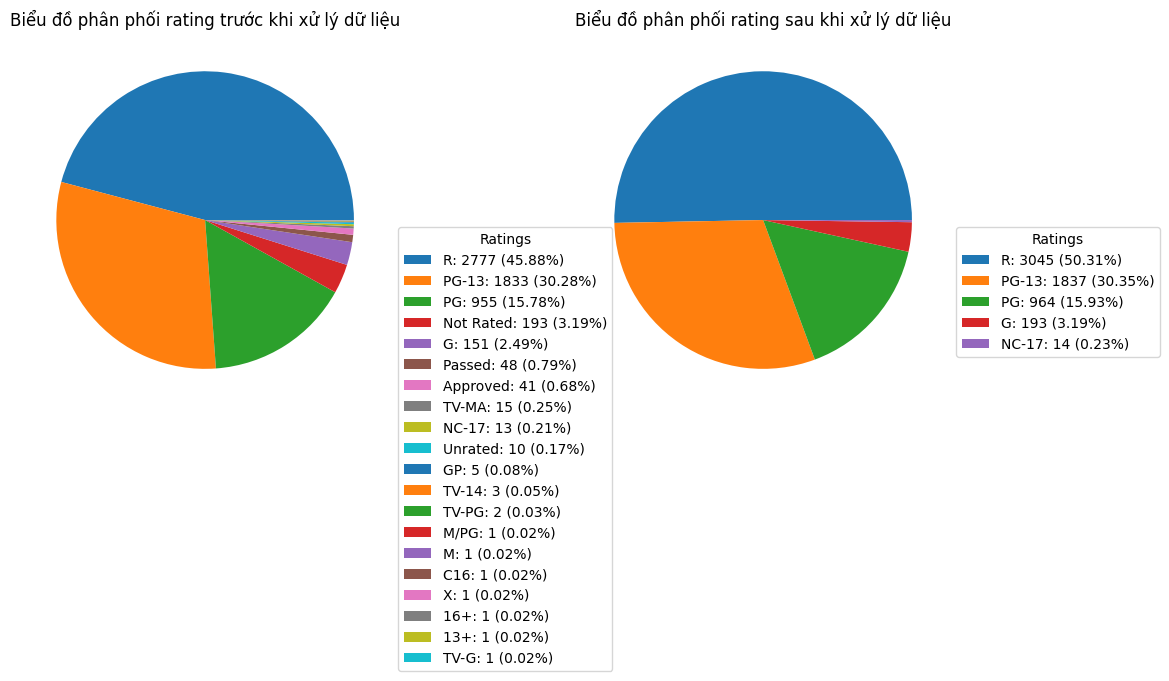

In [42]:
ratings_before = df_copy['rating']
rating_counts_before = ratings_before.value_counts()
ratings_after = df['rating']
rating_counts_after = ratings_after.value_counts()
# Tạo figure và subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# Vẽ biểu đồ và bảng chú thích cho subplot thứ nhất (rating trước)
plotPieChart(ax1,ratings_before, rating_counts_before, "trước", "rating")
plotPieChart(ax2,ratings_after, rating_counts_after, "sau", "rating")
plt.subplots_adjust(wspace=0.5)
# Hiển thị biểu đồ và bảng chú thích
plt.show()

**<p>3. Origin**

In [43]:
all_origins = df['origins'].explode().str.strip()
all_origins.value_counts(normalize=True).head(20)

United States     0.551201
United Kingdom    0.106924
Canada            0.057884
France            0.048035
Germany           0.046026
Japan             0.025023
Australia         0.020299
China             0.019194
Italy             0.011758
India             0.009848
Spain             0.009848
Hong Kong         0.009647
Mexico            0.009044
Belgium           0.004924
New Zealand       0.004723
Ireland           0.004623
South Korea       0.004221
Sweden            0.004020
Czech Republic    0.003718
Denmark           0.003216
Name: origins, dtype: float64

- Xuất xứ của các bộ phim chiếm đa số là ở United States và United Kingdom, còn lại sẽ nằm rải rác ở các xuất xứ còn lại. Do đó cần chia lại Orgins của các record bằng 4 trường phổ biến nhất đó chính là US, UK, USUK và Others.

In [44]:
def assign_country(row):
    if 'United States' in row['origins'] and 'United Kingdom' in row['origins']:
        return 'USUK'
    elif 'United States' in row['origins']:
        return 'US'
    elif 'United Kingdom' in row['origins']:
        return 'UK'
    else:
        return 'Others'
    
df['origins'] = df.apply(assign_country, axis=1)
df['origins'].value_counts()

US        4623
USUK       862
Others     366
UK         202
Name: origins, dtype: int64

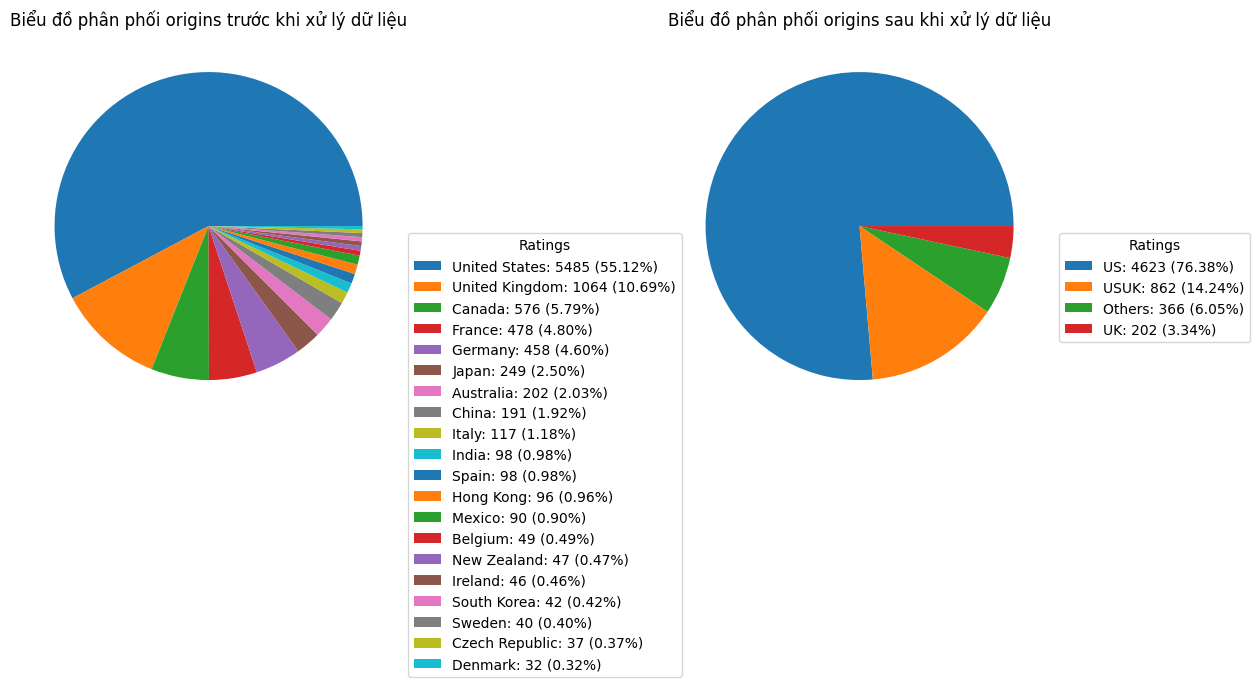

In [45]:
# plt.pie(df['origins'].value_counts(), labels=df['origins'].value_counts().index, autopct='%1.1f%%')
# plt.axis('equal')
# plt.title('Biểu đồ phân bố của origins sau khi xử lý dữ liệu trong dataframe')
# plt.show()
origins_before = df_copy['origins'].explode().str.strip()
origin_counts_before = origins_before.value_counts().head(20)
origins_after = df['origins'].explode().str.strip()
origin_counts_after = origins_after.value_counts()
# Tạo figure và subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
# Vẽ biểu đồ và bảng chú thích cho subplot thứ nhất (rating trước)
plotPieChart(ax1,origins_before, origin_counts_before, "trước", "origins")
plotPieChart(ax2,origins_after, origin_counts_after, "sau", "origins")
plt.subplots_adjust(wspace=0.5)
# Hiển thị biểu đồ và bảng chú thích
plt.show()

**<p>4. Gerne**

- Mỗi record (bộ phim) sẽ chứa nhiều hơn 1 thể loại, vì vậy để có thể số hóa các list thể loại của 1 bộ phim, ta sẽ sử dụng thư viện của sklearn là LabelEncoder. Thư viện này chuyển kiểu dữ liệu của cột gerne từ list thành numerics - mục đích là để phục vụ việc đánh giá độ chính xác của mô hình. 

In [46]:
df['genre'] = df['genre'].apply(lambda x: sorted(x))
df['genre'] = df['genre'].apply(lambda x: ','.join(x))
encoder = LabelEncoder()
df['genre_encoded'] = encoder.fit_transform(df['genre'])
counts = df['genre_encoded'].value_counts()

# Lấy danh sách thể loại tương ứng với từng giá trị genre_encoded
genres = encoder.inverse_transform(counts.index)

# Tạo DataFrame mới với các thông tin trên
genre_counts = pd.DataFrame({'genre_encoded': counts.index, 'count': counts.values, 'genre': genres})

# Hiển thị kết quả
print(genre_counts)

     genre_encoded  count                       genre
0              181    266        Comedy,Drama,Romance
1              173    203                Comedy,Drama
2              161    188                      Comedy
3               79    187  Adventure,Animation,Comedy
4               35    182          Action,Crime,Drama
..             ...    ...                         ...
342             83      1  Adventure,Animation,Sci-Fi
343            341      1              Romance,Sci-Fi
344            342      1     Romance,Sci-Fi,Thriller
345            135      1           Adventure,Western
346             19      1     Action,Animation,Sci-Fi

[347 rows x 3 columns]


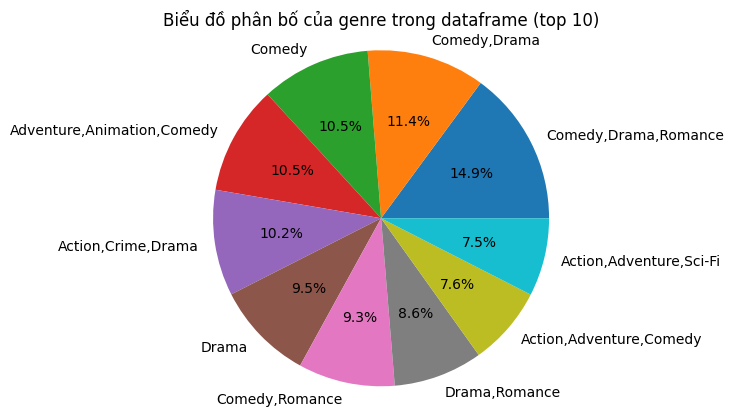

In [47]:
top_10_genres = genre_counts.head(10)

plt.pie(top_10_genres['count'], labels=top_10_genres['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Biểu đồ phân bố của genre trong dataframe (top 10)')
plt.show()

**<p>5. Companies, Writers, Stars, Directors.**

- Mỗi bộ phim sẽ có nhiều hơn 1 đạo diễn cũng như diễn viên chính, người viết kịch bản hay công ty sản xuất. Tiến hành đếm kinh nghiệm của các đạo diễn/diễn viên/người viết kịch bản/công ty sản xuất đó dựa trên dataset, sau đó ta có thể tạo ra mối quan hệ giữa các trường đó với điểm imdb rằng nếu giả sử rằng một dạo diễn có kinh nghiệm thì điểm imdb của phim đó có ảnh hưởng hay không so với một đạo diễn có ít kinh nghiệm hơn. Và nếu bộ phim có nhiều hơn 2 đạo diễn, ta sẽ chỉ xét kinh nghiệm của đạo diễn nào cao hơn cho record phim đó. Tương tự với 3 trường còn lại là companies, writers, stars.

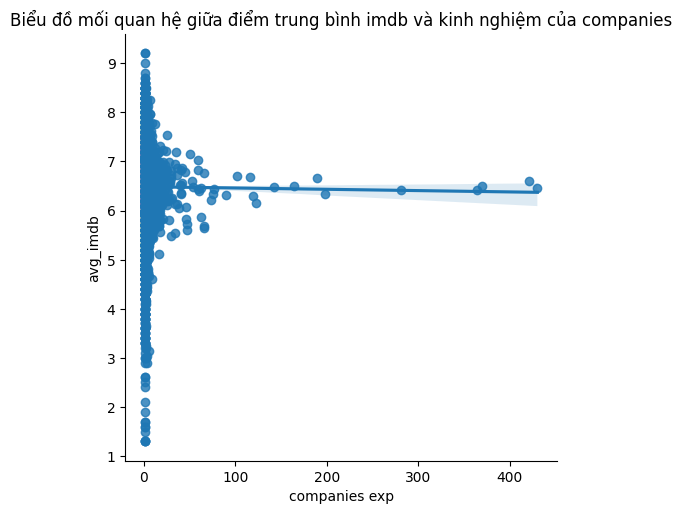

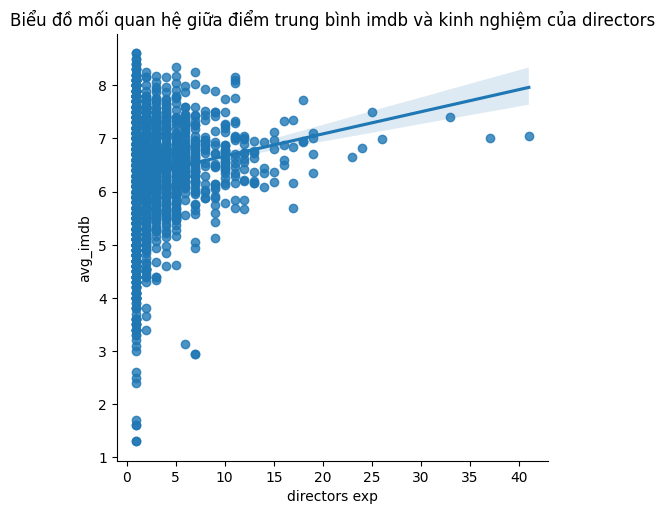

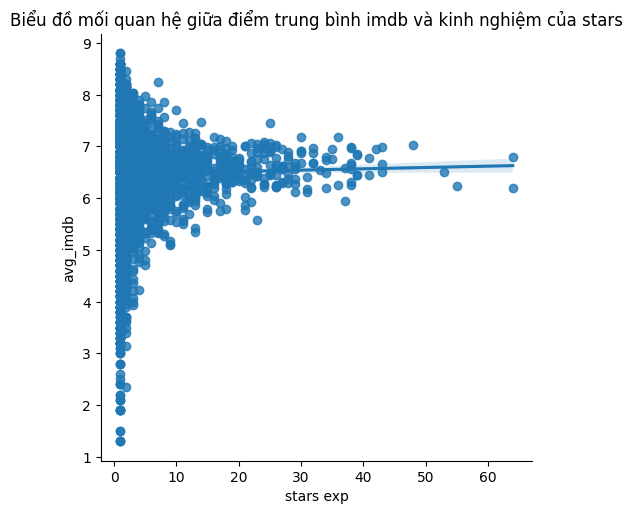

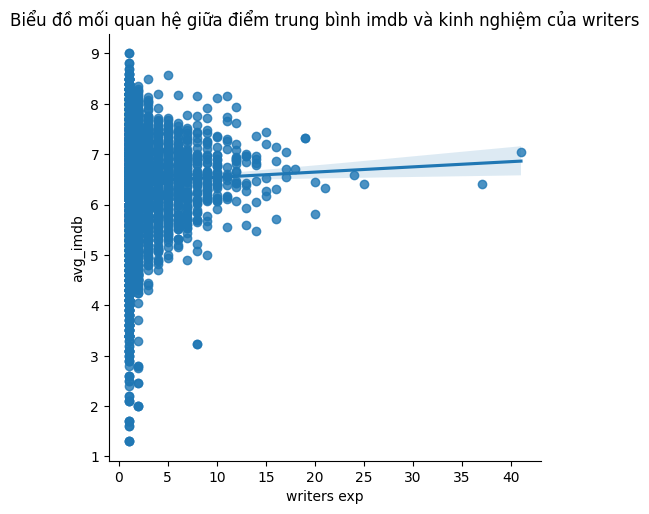

In [48]:
features = ['companies', 'directors', 'stars', 'writers']
for feat in features:
    feat_exp = df[feat].explode().str.strip().value_counts()
    mean = []
    for value in feat_exp.index:
        imdb = df[df[feat].apply(lambda x: value in x)]['imdb'].mean()
        mean_df = pd.DataFrame({feat: [value], feat + ' exp': [feat_exp[value]],'avg_imdb': [imdb]})
        mean.append(mean_df)
    mean_df = pd.concat(mean, ignore_index=True)
    sns.lmplot(data=mean_df, x=feat + ' exp', y='avg_imdb')
    plt.title(f"Biểu đồ mối quan hệ giữa điểm trung bình imdb và kinh nghiệm của {feat}")
    plt.show()

- Từ bốn đồ thị trên, ta có thể thấy rằng chủ yếu các đường thẳng hồi quy giữa 2 biến đều có xu hướng đồng biến, nghĩa rằng nếu creators càng có nhiều kinh nghiệm thì điểm imdb của phim sẽ càng lớn, điều này cho thấy rằng các biến companies_exp, directors_exp, stars_exp, writers_exp đều ảnh hưởng đến điểm imdb của bộ phim.

In [49]:
def get_max_exp(_list):
    if not _list:
        return 0
    return max([exp.get(c, 0) for c in _list])
feat_list_type = ['companies', 'directors', 'stars', 'writers']
for feat in feat_list_type:
    exp = df[feat].explode().str.strip().value_counts()
    df[f'{feat}_experience'] = df[feat].apply(get_max_exp)
df[['companies_experience', 'directors_experience', 'stars_experience', 'writers_experience']].head()

,companies_experience,directors_experience,stars_experience,writers_experience
0,35,6,23,10
2,198,1,1,1
3,369,3,18,7
4,430,2,16,4
6,369,5,12,10


**<p>6. Releaseds.**

- Ở trường releaseds, ta sẽ tách nó ra thành 4 cột mới đó chính là day, month, year và weekDay. <br>
- day, month, year sẽ là day, month, year của ngày phát hành bộ phim, weekDay là ngày trong tuần của ngày phát hành bộ phim - diễn ra từ thứ Hai -> Chủ Nhật


In [50]:
df = df.drop('year', axis=1)
df['releaseds'] = pd.to_datetime(df['releaseds'])
df['day'] = df['releaseds'].dt.day
df['month'] = df['releaseds'].dt.month
df['year'] = df['releaseds'].dt.year
df['weekDay'] = df['releaseds'].dt.weekday # (0 -> 6)
df[['day', 'month', 'year', 'weekDay']].head()


,day,month,year,weekDay
0,5,5,2023,4
2,21,4,2023,4
3,31,3,2023,4
4,5,4,2023,2
6,10,3,2023,4


# Thực hiện lại việc gán nhãn lại dữ liệu thành numerics sau khi đã làm sạch và xử lý dữ liệu

Gán lại nhãn dữ liệu

In [51]:
encoder = LabelEncoder()
df['rating_encoded'] = encoder.fit_transform(df['rating'])
df['origins_encoded'] = encoder.fit_transform(df['origins'])
df.head()

,title,rating,genre,runtime,imdb,votes,releaseds,budgets,companies,origins,...,companies_experience,directors_experience,stars_experience,writers_experience,day,month,year,weekDay,rating_encoded,origins_encoded
0,Guardians of the Galaxy Vol. 3,PG-13,"Action,Adventure,Comedy",150,8.3,73855,2023-05-05,250000000.0,"[Marvel Studios, Film New Zealand, Marvel Ente...",US,...,35,6,23,10,5,5,2023,4,3,2
2,Evil Dead Rise,R,Horror,96,7.0,39889,2023-04-21,12000000.0,"[Department of Post, Ghost House Pictures, New...",US,...,198,1,1,1,21,4,2023,4,4,2
3,Dungeons & Dragons: Honor Among Thieves,PG-13,"Action,Adventure,Comedy",134,7.4,79732,2023-03-31,150000000.0,"[Paramount Pictures, Entertainment One, Allspa...",USUK,...,369,3,18,7,31,3,2023,4,3,3
4,The Super Mario Bros. Movie,PG,"Adventure,Animation,Comedy",92,7.3,93663,2023-04-05,100000000.0,"[Universal Pictures, Nintendo, Illumination En...",US,...,430,2,16,4,5,4,2023,2,2,2
6,Scream VI,R,"Horror,Mystery,Thriller",122,6.7,66427,2023-03-10,35000000.0,"[Paramount Pictures, Spyglass Media Group, Pro...",US,...,369,5,12,10,10,3,2023,4,4,2


Loại bỏ những cột không cần thiết

In [52]:
drop_list = ['title', 'genre', 'releaseds', 'companies', 'rating', 'origins', 'directors', 'writers', 'stars','gross']
df = df.drop(drop_list, axis=1)
df.head()

,runtime,imdb,votes,budgets,genre_encoded,companies_experience,directors_experience,stars_experience,writers_experience,day,month,year,weekDay,rating_encoded,origins_encoded
0,150,8.3,73855,250000000.0,4,35,6,23,10,5,5,2023,4,3,2
2,96,7.0,39889,12000000.0,327,198,1,1,1,21,4,2023,4,4,2
3,134,7.4,79732,150000000.0,4,369,3,18,7,31,3,2023,4,3,3
4,92,7.3,93663,100000000.0,79,430,2,16,4,5,4,2023,2,2,2
6,122,6.7,66427,35000000.0,332,369,5,12,10,10,3,2023,4,4,2


# Chuẩn hóa dữ liệu

In [53]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,runtime,imdb,votes,budgets,genre_encoded,companies_experience,directors_experience,stars_experience,writers_experience,day,month,year,weekDay,rating_encoded,origins_encoded
0,0.418269,0.8750,0.023413,0.702246,0.011561,0.081395,0.125,0.349206,0.225,0.133333,0.363636,1.0,0.666667,0.75,0.666667
1,0.158654,0.7125,0.010958,0.033702,0.945087,0.460465,0.000,0.000000,0.000,0.666667,0.272727,1.0,0.666667,1.00,0.666667
2,0.341346,0.7625,0.025568,0.421345,0.011561,0.858140,0.050,0.269841,0.150,1.000000,0.181818,1.0,0.666667,0.75,1.000000
3,0.139423,0.7500,0.030677,0.280895,0.228324,1.000000,0.025,0.238095,0.075,0.133333,0.272727,1.0,0.333333,0.50,0.666667
4,0.283654,0.6750,0.020690,0.098310,0.959538,0.858140,0.100,0.174603,0.225,0.300000,0.181818,1.0,0.666667,1.00,0.666667


Vẽ đồ thị trước khi chuẩn hóa và sau khi chuẩn hóa dữ liệu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


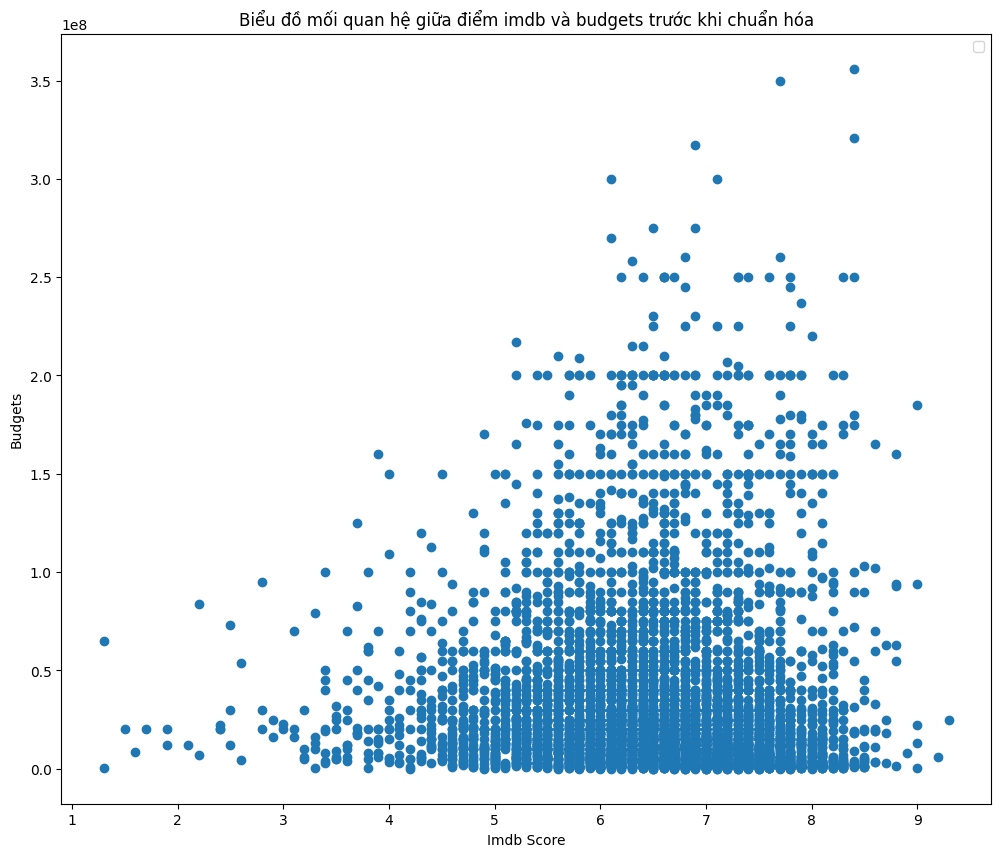

In [54]:
# Vẽ đồ thị
plt.figure(figsize=(12, 10))
# plt.scatter(df_scaled['imdb'], df_scaled['runtime'], label='y1')
plt.scatter(df['imdb'], df['budgets'])
# plt.scatter(df_scaled['imdb'], df_scaled['gross'], label='y3')

# Đặt các thông tin khác
plt.xlabel('Imdb Score')
plt.ylabel('Budgets')
plt.title('Biểu đồ mối quan hệ giữa điểm imdb và budgets trước khi chuẩn hóa')
plt.legend()

# Hiển thị đồ thị
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


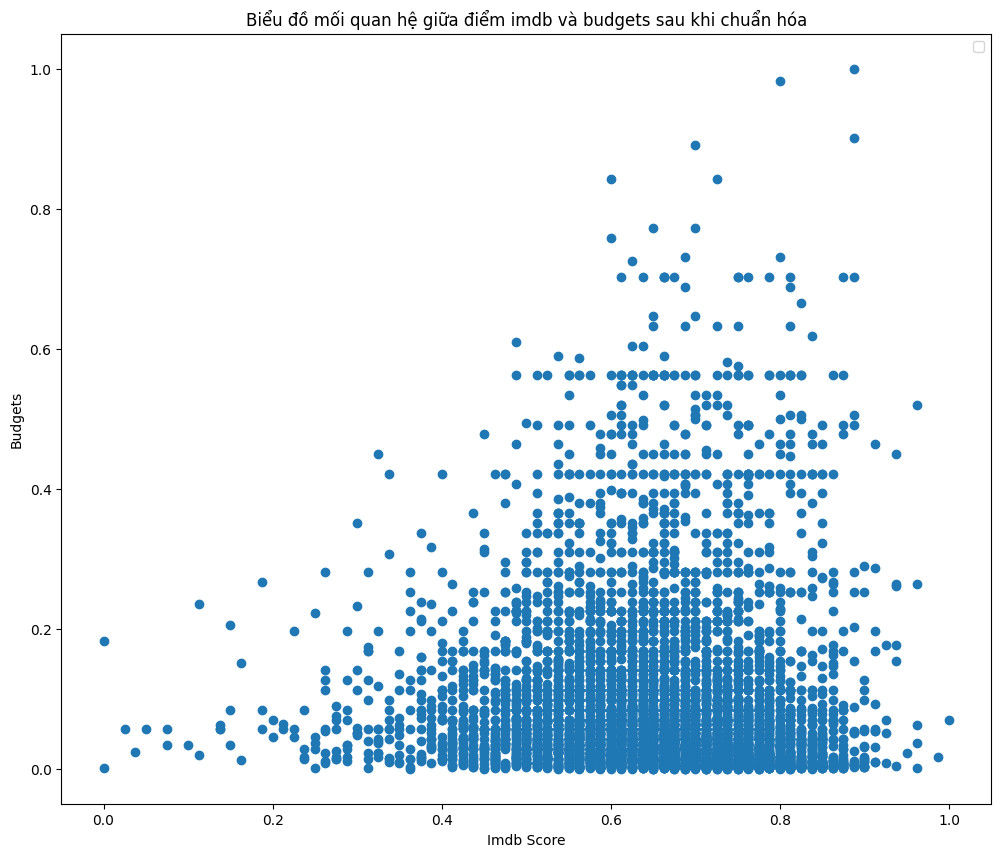

In [55]:
# Vẽ đồ thị
plt.figure(figsize=(12, 10))
# plt.scatter(df_scaled['imdb'], df_scaled['runtime'], label='y1')
plt.scatter(df_scaled['imdb'], df_scaled['budgets'])
# plt.scatter(df_scaled['imdb'], df_scaled['gross'], label='y3')

# Đặt các thông tin khác
plt.xlabel('Imdb Score')
plt.ylabel('Budgets')
plt.title('Biểu đồ mối quan hệ giữa điểm imdb và budgets sau khi chuẩn hóa')
plt.legend()

# Hiển thị đồ thị
plt.show()

# Xuất dữ liệu sau khi tiền xử lý ra file csv

In [56]:
#write to csv
df.to_csv('Big_DS_preprocessed.csv', index=False)